In [1]:
import os
import json

from draco import Draco
from draco.data_utils import pairs_to_vec

from typing import DefaultDict, Dict, List, Any
from collections import defaultdict

import numpy as np
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy

In [2]:
## get raw weight

weight_files = [txt_file for txt_file in os.listdir('./baseline-plus-one-train-weight-outputs/') if txt_file.endswith('.txt')]

raw_weights = {}

for weight_file in weight_files:
    file_name = weight_file.split('.')[0]
    
    if file_name.startswith("plus"):
        paper = file_name.split('.')[0].split('-')[1]
    else:
        paper = file_name
    
    raw_weights[paper] = {}
    
    fr = open('./baseline-plus-one-train-weight-outputs/'+ weight_file, 'r')
    lines = fr.readlines()

    for line in lines:
        weight_name = line.split(" ")[1]
        weight_split = weight_name.split("_")[:-1]
        wname = "_".join(weight_split)
        weight_value = int(line.split('=')[1].strip().strip('.'))
        raw_weights[paper][wname] = weight_value

In [3]:
### normalization: (plus-one - baseline): positive - 1, negative - (-1), same - 0

fr = open("visualization-space-coverage.json", 'r')
filtered_soft_coverage = json.load(fr)

norm_weights = {}

for paper in raw_weights:
    if paper == "baseline-APT":
        continue
        
    norm_weights[paper] = {}
    for soft in filtered_soft_coverage[paper]:
        if filtered_soft_coverage[paper][soft] == 0:
            norm_weights[paper][soft] = 0
        else:
            if raw_weights[paper][soft] - raw_weights["baseline-APT"][soft] > 0:
                norm_weights[paper][soft] = 1
            elif raw_weights[paper][soft] - raw_weights["baseline-APT"][soft] < 0:
                norm_weights[paper][soft] = -1
            else:
                norm_weights[paper][soft] = 0

print (norm_weights)

{'Javed2010graphical(E)': {'aggregate': 0, 'aggregate_group_by_raw': 0, 'aggregate_mean': 0, 'aggregate_no_discrete': 0, 'c_c_area': 1, 'c_c_line': -1, 'c_c_point': 0, 'c_d_col': 0, 'c_d_no_overlap_bar': 0, 'c_d_no_overlap_line': 0, 'c_d_no_overlap_point': 0, 'c_d_overlap_bar': 0, 'c_d_overlap_line': 0, 'c_d_overlap_point': 0, 'cartesian_coordinate': -1, 'categorical_color': -1, 'categorical_scale': -1, 'color_entropy_high': 0, 'color_entropy_low': 0, 'continuous_not_zero': 1, 'continuous_pos_not_zero': 1, 'd_d_point': 0, 'd_d_rect': 0, 'd_d_text': 0, 'date_not_x': 0, 'date_scale': 0, 'encoding': 0, 'encoding_field': 0, 'interesting_color': 1, 'interesting_column': 0, 'interesting_row': -1, 'interesting_shape': 0, 'interesting_size': 0, 'interesting_text': 0, 'interesting_x': 0, 'interesting_y': -1, 'linear_color': 1, 'linear_scale': 1, 'linear_size': 0, 'linear_text': 0, 'linear_x': 1, 'linear_y': 1, 'log_scale': 0, 'log_y': 0, 'multi_non_pos': 0, 'non_pos_used_before_pos': 0, 'number

In [5]:
paper_arr = list(norm_weights.keys())
soft_arr = list(filtered_soft_coverage["Mackinlay1986automating(T)"].keys())

heatmap_data = []

for paper in paper_arr:
    temp_arr = []
    for soft in soft_arr:
        temp_arr.append(norm_weights[paper][soft])
    heatmap_data.append(temp_arr)

fig = ff.create_dendrogram(np.array(heatmap_data), orientation='right', labels=paper_arr, color_threshold=10)
fig.update_layout(width=400, height=870)
fig.show()

paper_order = fig['layout']['yaxis']['ticktext']
paper_order = list(paper_order)
paper_order.reverse()

print (paper_order)

['Heer2010crowdsourcing(E)', 'Cleveland1984graphical(E)', 'Javed2010graphical(E)', 'Correll2012comparing(E)', 'Albers2014task(E)', 'Gogolou2018comparing(E)', 'Gramazio2014relation(E)', 'Hong2021weighted(E)', 'Saket2018task(E)', 'Jardine2019perceptual(E)', 'McColeman2021rethinking(E)', 'Mylavarapu2019ranked(E)', 'Chung2016how(E)', 'Golebiowska2020rainbow(E)', 'Gleicher2013perception(E)', 'Ondov2018face(E)', 'Araya2019comparison(E)', 'Ryan2018glance(E)', 'Correll2017regression(E)', 'Nusrat2018evaluating(E)', 'Godau2016perception(E)', 'Redmond2019visual(E)', 'Aigner2011bertin(E)', 'Correll2020truncating(E)', 'Waldner2019comparison(E)', 'Kosara2019impact(E)', 'Cleveland1984graphical(T)', 'Panavas2022juvenile(E)', 'Kim2018assessing(E)']


/var/folders/kc/10tt758d1d19lddd9gwdr1rc0000gn/T/ipykernel_71628/4105453962.py:25: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



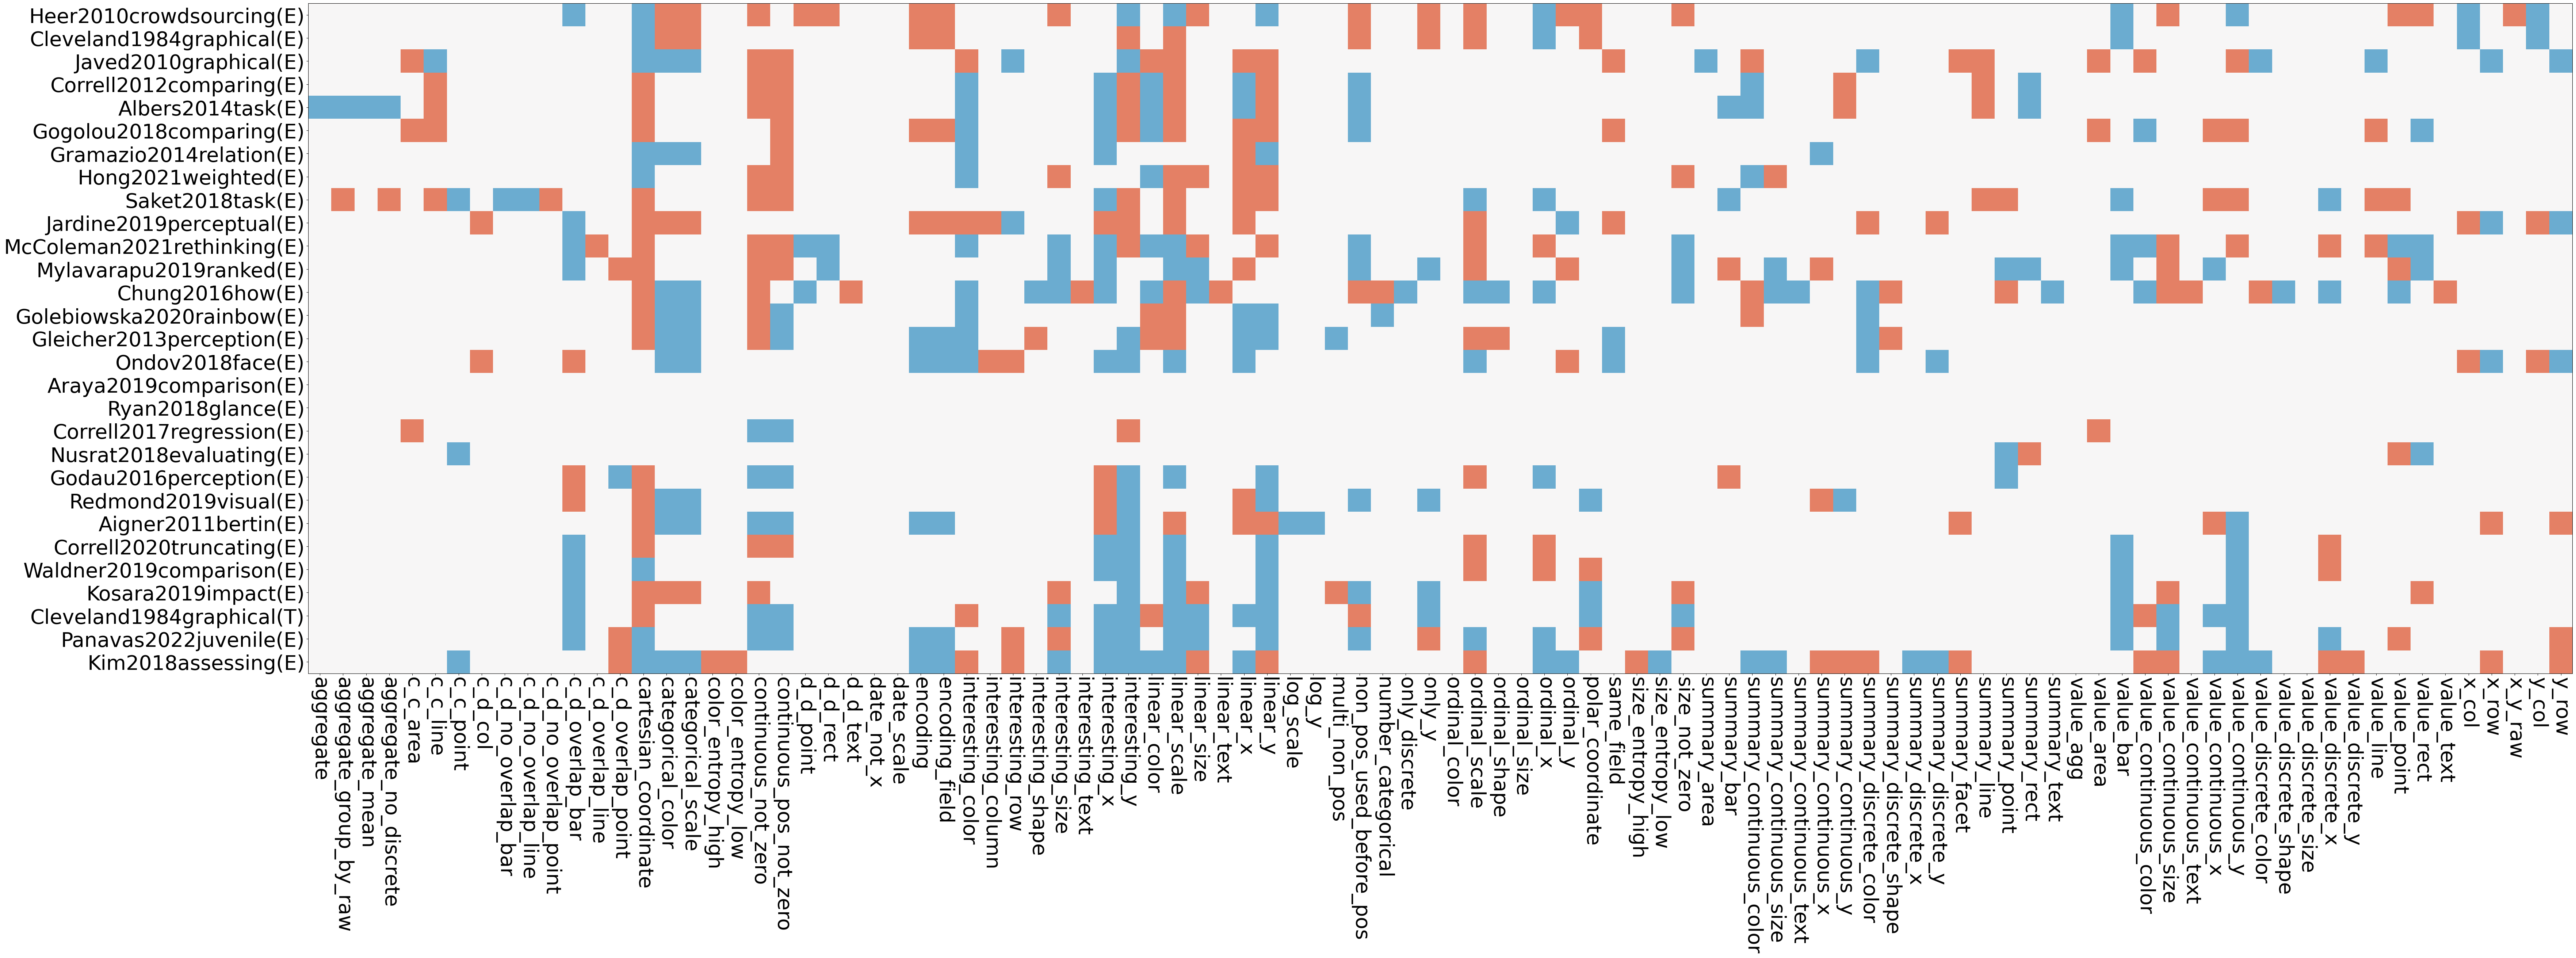

In [6]:
heatmap_school = []

for paper in paper_order:
    temp_arr = []
    for soft in soft_arr:
        temp_arr.append(norm_weights[paper][soft])
    heatmap_school.append(temp_arr)


figg, ax = plt.subplots()
cax = ax.matshow(heatmap_school, norm=colors.Normalize(vmin=-2, vmax=2), cmap=plt.cm.RdBu_r)

x_positions = list(range(len(soft_arr)))
ax.xaxis.set_ticks(x_positions)
ax.xaxis.set_ticklabels(soft_arr)
plt.gca().xaxis.tick_bottom()
plt.xticks(rotation=270,fontsize=40)

y_positions = list(range(len(paper_order)))
ax.yaxis.set_ticks(y_positions)
ax.yaxis.set_ticklabels(paper_order)
plt.yticks(fontsize=40)

figg.set_size_inches(80, 60)
figg.show()

['Heer2010crowdsourcing(E)', 'Kosara2019impact(E)', 'Correll2020truncating(E)', 'Waldner2019comparison(E)', 'Jardine2019perceptual(E)', 'Cleveland1984graphical(E)', 'Cleveland1984graphical(T)', 'Panavas2022juvenile(E)', 'Redmond2019visual(E)', 'Godau2016perception(E)', 'Ondov2018face(E)', 'Gleicher2013perception(E)', 'Golebiowska2020rainbow(E)', 'Aigner2011bertin(E)', 'Javed2010graphical(E)', 'Saket2018task(E)', 'Gogolou2018comparing(E)', 'Correll2012comparing(E)', 'Albers2014task(E)', 'McColeman2021rethinking(E)']


/var/folders/kc/10tt758d1d19lddd9gwdr1rc0000gn/T/ipykernel_71628/2550308512.py:49: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



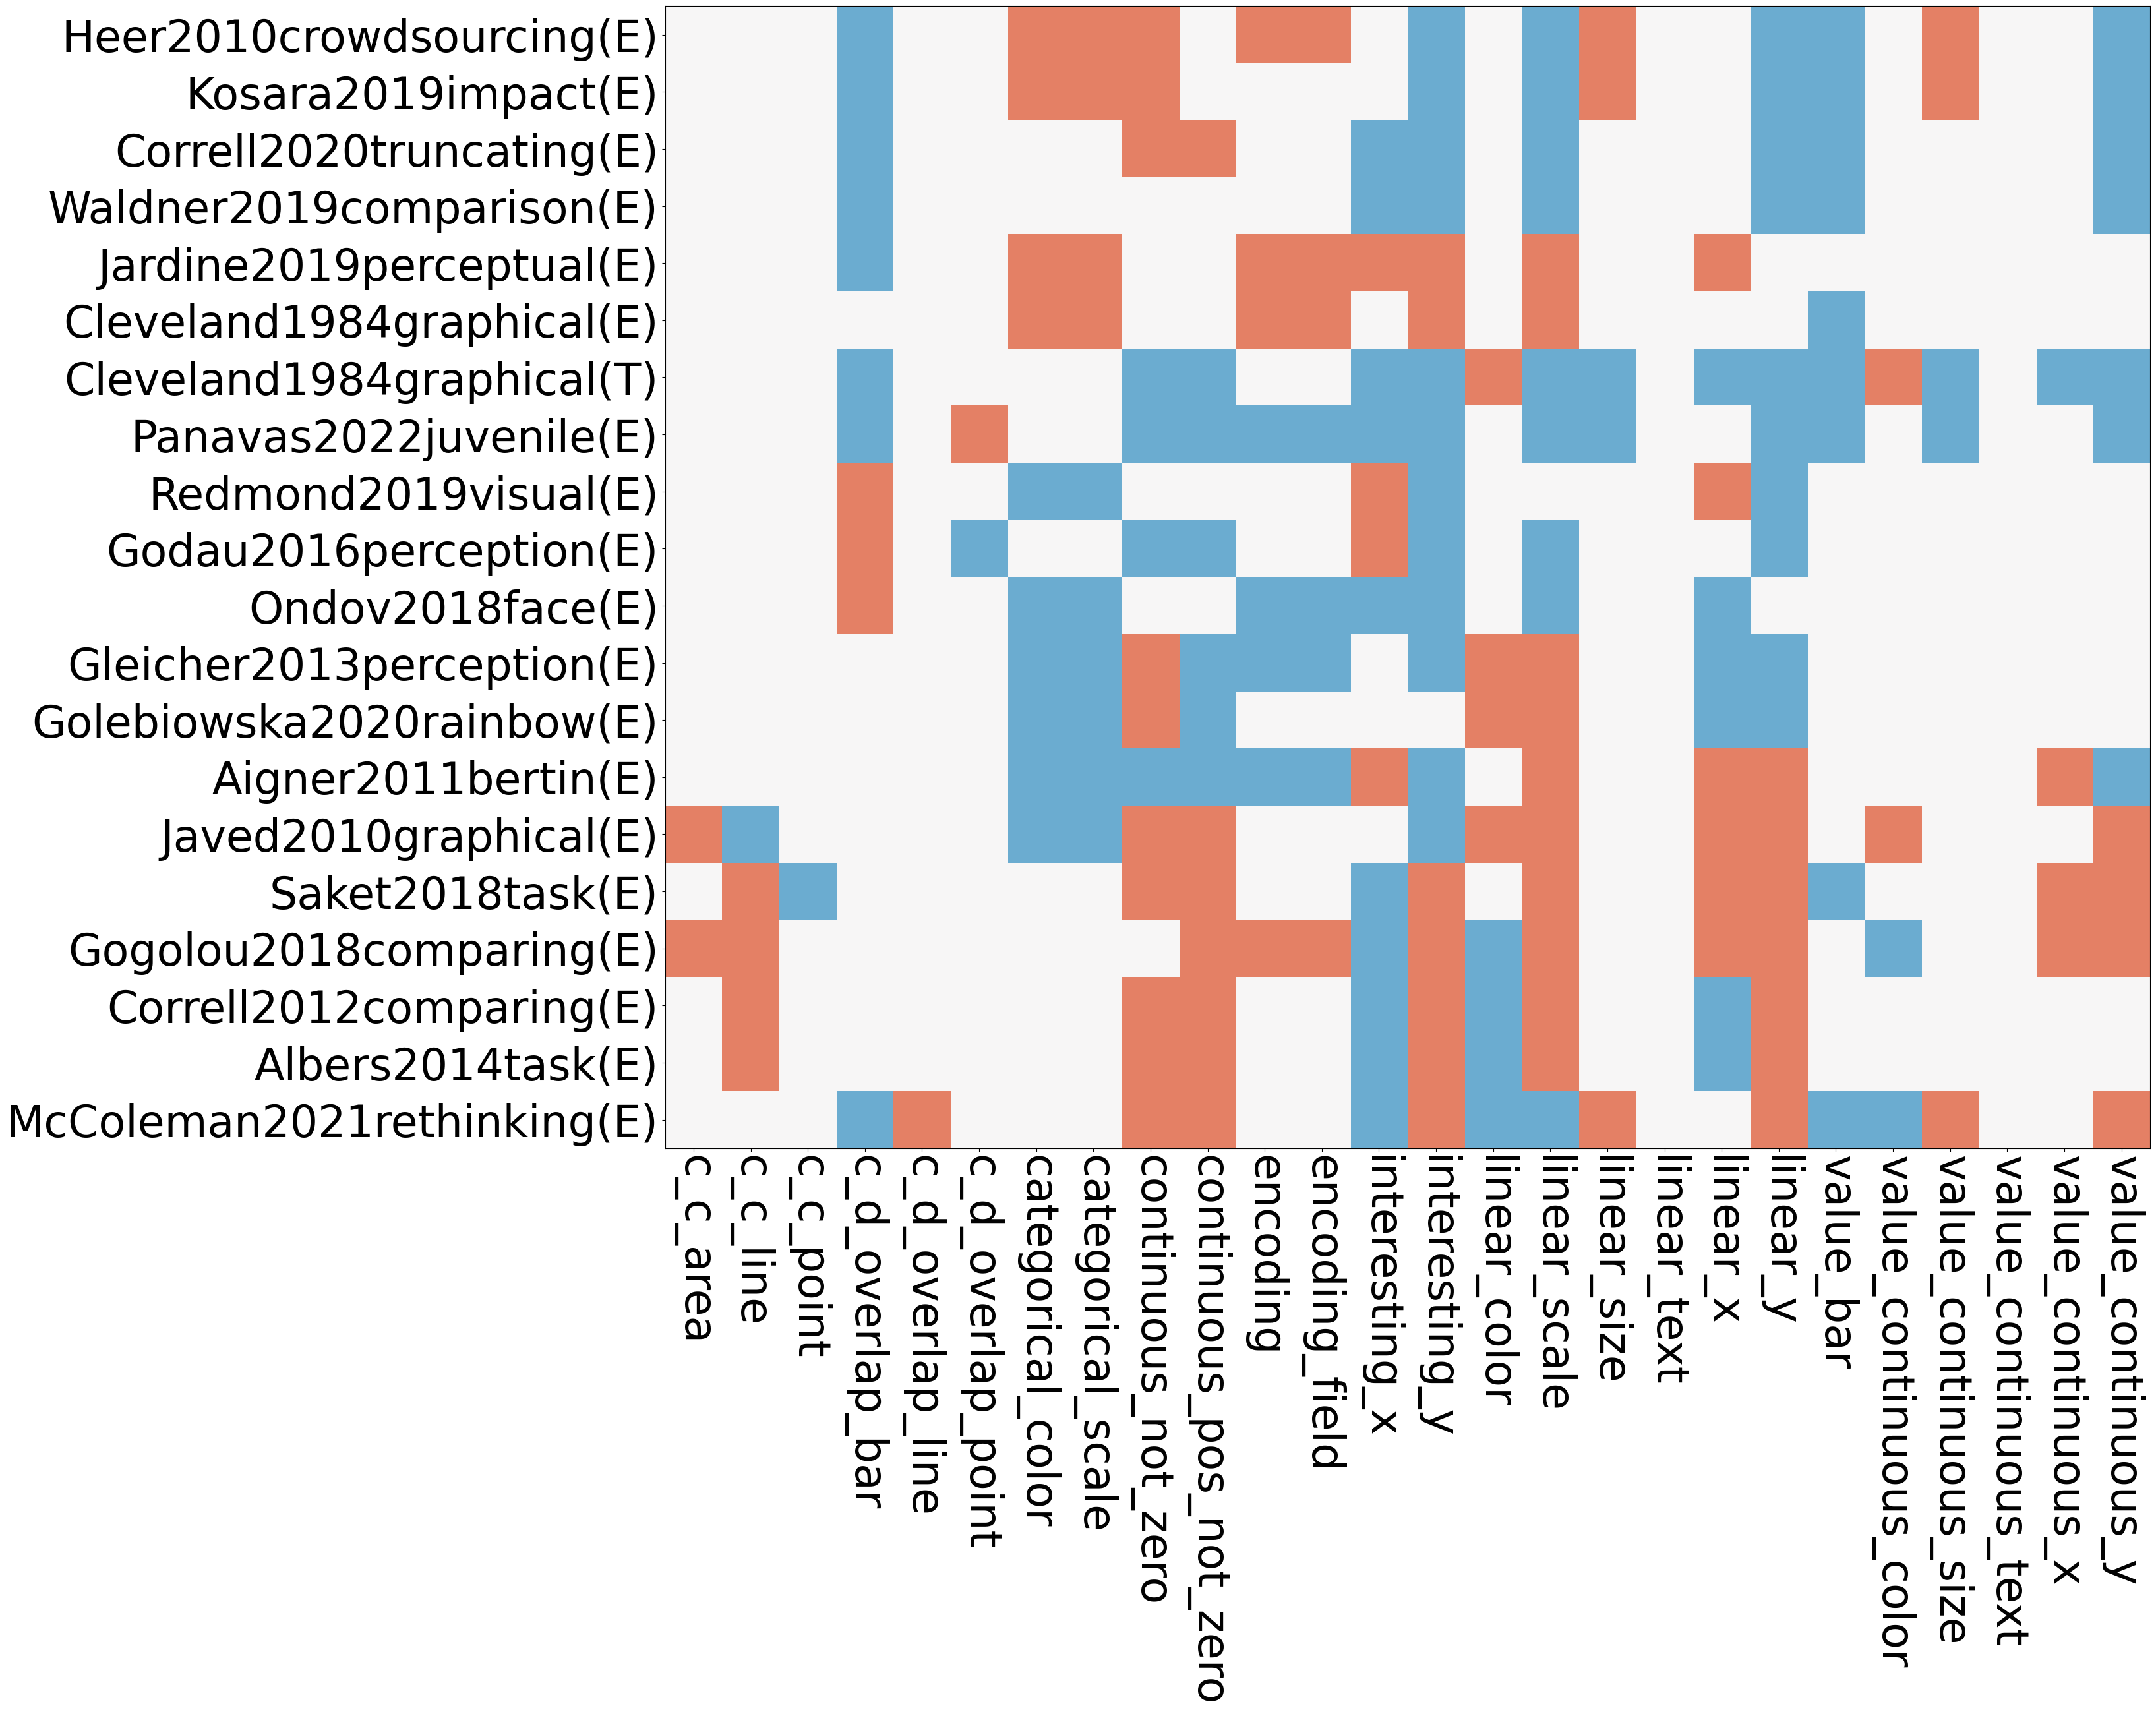

In [8]:
## selected papers and soft constraints for analysis

selected_papers = ["Waldner2019comparison(E)", "Correll2020truncating(E)", "Kosara2019impact(E)", "Heer2010crowdsourcing(E)", "Javed2010graphical(E)", "Albers2014task(E)", "Correll2012comparing(E)", "Gogolou2018comparing(E)", "Saket2018task(E)", "Golebiowska2020rainbow(E)", "Gleicher2013perception(E)", "Ondov2018face(E)", "Godau2016perception(E)", "Redmond2019visual(E)", "Aigner2011bertin(E)", "Panavas2022juvenile(E)", "Cleveland1984graphical(E)", "Cleveland1984graphical(T)", "Jardine2019perceptual(E)", "McColeman2021rethinking(E)"]
selected_softs = ["c_c_area", "c_c_line", "c_c_point", "c_d_overlap_bar", "c_d_overlap_line", "c_d_overlap_point", "categorical_color", "categorical_scale", "continuous_not_zero", "continuous_pos_not_zero", "encoding", "encoding_field", "interesting_x", "interesting_y", "linear_color", "linear_scale", "linear_size", "linear_text", "linear_x", "linear_y", "value_bar", "value_continuous_color", "value_continuous_size", "value_continuous_text", "value_continuous_x", "value_continuous_y"]

heatmap_data = []

for paper in selected_papers:
    temp_arr = []
    for soft in selected_softs:
        temp_arr.append(norm_weights[paper][soft])
    heatmap_data.append(temp_arr)

fig = ff.create_dendrogram(np.array(heatmap_data), orientation='right', labels=selected_papers, color_threshold=10)
fig.update_layout(width=400, height=870)
fig.show()

paper_order = fig['layout']['yaxis']['ticktext']
paper_order = list(paper_order)
paper_order.reverse()

print (paper_order)


heatmap_school = []

for paper in paper_order:
    temp_arr = []
    for soft in selected_softs:
        temp_arr.append(norm_weights[paper][soft])
    heatmap_school.append(temp_arr)


figg, ax = plt.subplots()
cax = ax.matshow(heatmap_school, norm=colors.Normalize(vmin=-2, vmax=2), cmap=plt.cm.RdBu_r)

x_positions = list(range(len(selected_softs)))
ax.xaxis.set_ticks(x_positions)
ax.xaxis.set_ticklabels(selected_softs)
plt.gca().xaxis.tick_bottom()
plt.xticks(rotation=270,fontsize=48)

y_positions = list(range(len(paper_order)))
ax.yaxis.set_ticks(y_positions)
ax.yaxis.set_ticklabels(paper_order)
plt.yticks(fontsize=48)

figg.set_size_inches(30, 22.5)
figg.show()